# Homework 3 Solutions

## Part 1 - List and `numpy` practice

For this part, import the `numpy` library and the *new* way to do random number generation using `numpy` given [here](https://numpy.org/doc/stable/reference/random/index.html#random-quick-start).

Generate 10 values from a standard normal distribution and print those out.  Note: each time you run your code you'll get different values unless you set a seed (feel free to if you'd like, not required).

In [7]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(seed = 1)

vals = rng.poisson(lam = 3, size = 30)
print(vals)

[4 4 4 2 2 6 3 4 2 5 3 4 4 1 4 4 3 7 2 2 2 0 2 4 5 3 3 3 5 1]


Now, we'll use a list comprehension to generate a bunch of means from randomly generated standard normal data sets, each of size 10.

To start, use `numpy`'s mean function to find the mean of your 10 values above.

In [8]:
np.mean(vals)

3.2666666666666666

Use a list comprehension to generate 5000 data sets.  In your list comprehension, return the mean of the 30 randomly generated values.  

If it helps, write this via a for loop first and then translate it to a list comprehension!  Pseudo code for the loop:
- Initialize an empty list (not needed for the comprehension)
- Have your for loop iterate from 0 to 4999 
    + Notice you don't really use the index anywhere! Commonly you'd use `_` as the index in a case like this.
- Generate the data using code from above and find the mean of it
- Append that mean value to your list

In [9]:
#for loop just to show that
list_for_means = []
for _ in range(0, 5000):
    list_for_means.append(np.mean(rng.poisson(3,30)))

In [10]:
poisson_means = [np.mean(rng.poisson(3, 30)) for _ in range(0,5000)]


Now run the code below to create a histogram of the means (make sure you've installed the `matplotlib` module). You should see a histogram that looks roughly like a Normal distribution with mean 0 and standard deviation $\frac{1}{\sqrt{10}}$.

0.31400772927500437

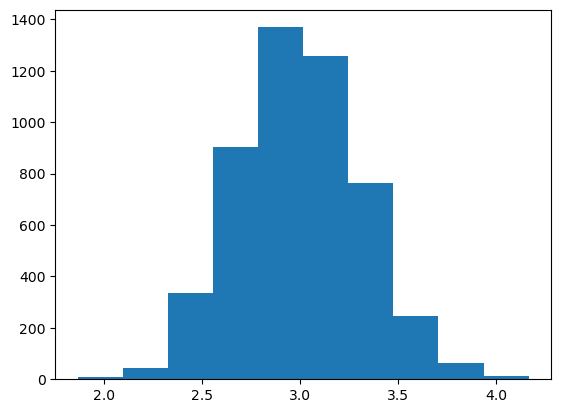

In [15]:
import matplotlib.pyplot as plt
plt.hist(list_for_means)
np.std(poisson_means)

## Part 2 - Dictionary Practice

In this part, we'll count the number of words in a book using a for loop and a dictionary.  Use the code below to read in the book as a string.  Remember you'll need to place the `.txt` file somewhere python can find it.

In [18]:
#read in string
with open('charles-dickens-oliver-twist.txt', 'r') as f:
    lines = f.read()
print(lines[:100])

ï»¿The Project Gutenberg EBook of Oliver Twist, by Charles Dickens

This eBook is for the use of any


Remove the first part of the book (up to "CHAPTER I") and the last portion of the book.  This process is similar to what you did in HW 2 so use that code - although finding the end of the book will rely on a different string than what we looked for in HW 2.

Print out the first and last 250 characters of the book once you've shortened it appropriately.

In [37]:
#get indices for the first and last bits
first_bit = lines.find("CHAPTER I")
last_bit = lines.find("End of the Project Gutenberg EBook")
mylines = lines[first_bit:last_bit]
#check that it worked correctly by printing out the first 250 and last 250 characters
print(mylines[:250], "\n\n", mylines[-250:])

CHAPTER I

TREATS OF THE PLACE WHERE OLIVER TWIST WAS BORN AND OF THE
CIRCUMSTANCES ATTENDING HIS BIRTH

Among other public buildings in a certain town, which for many reasons
it will be prudent to refrain from mentioning, and to which I will
assign  

 d by the love--the love beyond the
grave--of those whom they knew in life, I believe that the shade of
Agnes sometimes hovers round that solemn nook. I believe it none the
less because that nook is in a Church, and she was weak and erring.













Our goal is to iterate through the words in the book and count the number of times each word occurs.  We can use a dictionary to store this type of data!  For instance, you'll end up with a key of "the" with a corresponding value being the number of times "the" occurred.

Some hints:
- Import the string module as we'll use it below
- Replace all the "\n" values with spaces as we did previously
- Split the text up via the spaces to get a list of 'words' you can iterate over
- Create an empty dictionary to store the words and the number of occurrences 
- When iterating:
    + If you get a space, ignore that iteration of the loop (that is move to the next iteration)
    + Convert each 'word' to lower case
    + We'll need to remove any punctuation (for instance, "end." would need the '.' removed).
        * The object `string.punctuation` has a list of punctuation marks
        * You can write a nested for loop that iterates over the values in `string.punctuation`.  If the punctuation value exists in the 'word' then you can use the `.replace()` method to replace it with an empty string "".  This loop should remove any punctuation!  (Note: this will make words like didn't into didnt, that's fine - ignore that as it will still count appropriately for the most part.)
    + Now the 'word' is processed and we are ready to count.  Use `if`/`else` logic to check if the the word already exists in the dictionary.  If it does, add one to the associated value.  If not, add that key to the dictionary with a value of 1.

In [22]:
#import string so we can get punctuation
import string

word_count_dictionary = {}
lines_short = mylines.replace("\n", " ")
book = lines_short.split(" ")
# now loop through the elements
for word in book:
    #if it is a space move on
    if not word:
        continue
    #lowercase everything to make it match up
    word = word.lower()
    #need to remove any punctionation, ., ', !, ?, etc. (this will mess up didn't etc. but let's ignore that)
    for symbol in string.punctuation:
        word = word.replace(symbol, "")
    #now add to the dictionary 
    if word in word_count_dictionary:
        word_count_dictionary[word] += 1
    else:
        word_count_dictionary[word] = 1

Use the `sorted` function to get the 25 most prevalent keys.

In [33]:
prevalent = sorted(word_count_dictionary, key = word_count_dictionary.get, reverse = True)[0:25]
prevalent

['the',
 'and',
 'to',
 'of',
 'a',
 'he',
 'in',
 'his',
 'that',
 'was',
 'it',
 'i',
 'you',
 'with',
 'as',
 'said',
 'had',
 'for',
 'mr',
 'him',
 'at',
 'on',
 'which',
 'this',
 'her']

In [34]:
for i in prevalent:
    print(i, ": ", word_count_dictionary.get(i))

the :  9558
and :  5322
to :  3850
of :  3829
a :  3696
he :  2389
in :  2362
his :  2343
that :  1827
was :  1783
it :  1705
i :  1625
you :  1602
with :  1562
as :  1313
said :  1230
had :  1223
for :  1140
mr :  1070
him :  1057
at :  986
on :  931
which :  870
this :  795
her :  781


## Part 3: Reading Data with `pandas` (and a Bit More) Practice

1. Read in the BreastCancer.dat data file available in the assignment link. (Open the file in a program such as notepad or wordpad to determine the delimiter - although a program like notepad++ is a better choice.)  

    a. Save the data as an object called `cancer_data`.  
    b. Use the `.head()` method to look at the data.

In [2]:
import pandas as pd
cancer_data = pd.read_csv("BreastCancer.dat", sep = "\t")
cancer_data.head()

,id,age,meno,size,grade,gradd1,gradd2,nodes,enodes,pgr,er,hormon,rectime,censrec,_st,_d,_t,_t0
0,132,49,premenopausal,18,2,1,0,2,0.786628,0,0,no tamoxifen,1838,0,1,0,5.032170,0
1,1575,55,Postmenopausal,20,3,1,1,16,0.146607,0,0,no tamoxifen,403,1,1,1,1.103354,0
2,1140,56,Postmenopausal,40,3,1,1,3,0.697676,0,0,no tamoxifen,1603,0,1,0,4.388775,0
3,769,45,premenopausal,25,3,1,1,1,0.886921,0,4,no tamoxifen,177,0,1,0,0.484600,0
4,130,65,Postmenopausal,30,2,1,0,5,0.548812,0,36,had tamoxifen,1855,0,1,0,5.078713,0


c. Return just the `grade` column using an attribute


In [3]:
cancer_data.grade

0      2
1      3
2      3
3      3
4      2
      ..
681    3
682    2
683    3
684    2
685    2
Name: grade, Length: 686, dtype: int64

d. Use the `.loc[]` method to print out all rows where the `size` is larger than 30.

In [4]:
cancer_data.loc[cancer_data["size"] > 30]

,id,age,meno,size,grade,gradd1,gradd2,nodes,enodes,pgr,er,hormon,rectime,censrec,_st,_d,_t,_t0
2,1140,56,Postmenopausal,40,3,1,1,3,0.697676,0,0,no tamoxifen,1603,0,1,0,4.388775,0
5,1642,48,premenopausal,52,2,1,0,11,0.267135,0,0,no tamoxifen,842,1,1,1,2.305270,0
14,820,32,premenopausal,57,3,1,1,24,0.056135,0,13,no tamoxifen,448,1,1,1,1.226557,0
19,1185,58,Postmenopausal,45,3,1,1,4,0.618783,0,0,no tamoxifen,370,1,1,1,1.013005,0
30,777,49,premenopausal,55,2,1,0,7,0.431710,0,0,no tamoxifen,679,1,1,1,1.859001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,157,59,Postmenopausal,45,2,1,0,6,0.486752,739,526,no tamoxifen,740,0,1,0,2.026010,0
673,1137,47,premenopausal,70,2,1,0,5,0.548812,796,24,no tamoxifen,1703,0,1,0,4.662560,0
674,1171,48,Postmenopausal,35,1,0,0,2,0.786628,845,105,had tamoxifen,1578,0,1,0,4.320328,0
675,1178,64,Postmenopausal,35,1,0,0,4,0.618783,858,15,no tamoxifen,722,0,1,0,1.976728,0


e. Use the `.loc[]` method to print out all rows where the `size` is greater than 30 and the `grade` is 3.

In [5]:
cancer_data.loc[(cancer_data["size"] > 30) & (cancer_data["grade"] == 3)]

,id,age,meno,size,grade,gradd1,gradd2,nodes,enodes,pgr,er,hormon,rectime,censrec,_st,_d,_t,_t0
2,1140,56,Postmenopausal,40,3,1,1,3,0.697676,0,0,no tamoxifen,1603,0,1,0,4.388775,0
14,820,32,premenopausal,57,3,1,1,24,0.056135,0,13,no tamoxifen,448,1,1,1,1.226557,0
19,1185,58,Postmenopausal,45,3,1,1,4,0.618783,0,0,no tamoxifen,370,1,1,1,1.013005,0
32,588,56,Postmenopausal,40,3,1,1,1,0.886921,0,3,no tamoxifen,1013,0,1,0,2.773443,0
37,735,48,premenopausal,45,3,1,1,1,0.886921,0,0,no tamoxifen,1862,0,1,0,5.097878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1239,37,premenopausal,35,3,1,1,1,0.886921,242,67,no tamoxifen,205,1,1,1,0.561259,0
637,884,53,premenopausal,75,3,1,1,19,0.102284,375,107,no tamoxifen,600,1,1,1,1.642710,0
652,1488,66,Postmenopausal,42,3,1,1,11,0.267135,412,339,had tamoxifen,394,1,1,1,1.078713,0
664,346,63,Postmenopausal,45,3,1,1,2,0.786628,530,328,no tamoxifen,2148,0,1,0,5.880903,0


f. Use `[]` to return just the `age`, `size`, and `grade` columns.

In [6]:
cancer_data[["age", "size", "grade"]]

,age,size,grade
0,49,18,2
1,55,20,3
2,56,40,3
3,45,25,3
4,65,30,2
...,...,...,...
681,51,30,3
682,64,26,2
683,57,35,3
684,44,21,2


g. Use `.loc[]` to return the rows where `meno` is equal to `premenopausal` along with the `age`, `size`, and `grade` columns.

In [7]:
cancer_data.loc[cancer_data["meno"] == "premenopausal", ["age", "size", "grade"]]

,age,size,grade
0,49,18,2
3,45,25,3
5,48,52,2
6,48,21,3
7,37,20,2
...,...,...,...
669,38,61,2
673,47,70,2
679,43,20,2
681,51,30,3


h. Fit the multiple linear regression model on the subsetted data.

In [11]:
import numpy as np
sub_cancer = cancer_data.loc[cancer_data["meno"] == "premenopausal", ["age", "size", "grade"]]
X = np.array(list(zip(np.ones(sub_cancer.shape[0]), sub_cancer.age, sub_cancer.grade)))
y = np.array(sub_cancer["size"])
X.shape
np.ones(sub_cancer.shape[0]).shape

(290,)

In [ ]:
XTXinv = np.linalg.inv(np.matmul(X.transpose(), X))
np.matmul(np.matmul(XTXinv, X.transpose()), y)

2. There are two files about mosquitos available at:
- <https://www4.stat.ncsu.edu/~online/datasets/mosquito.txt>
- <https://www4.stat.ncsu.edu/~online/datasets/mosquito2.txt>

    a. Repeat the above process to read in the mosquito.txt file as an object called `mosq_data`.  
    b. Read in the mosquito2.txt file. Note this file doesn’t contain column names! The columns are the same as the other file though.  Use an attribute from `mosq_data` to assign the column names as you read in the data.  Save this data as an object called `mosq_data2`.  
    c. Combine the two datasets into one data frame using the `concat()` function from `pandas`.  

In [83]:
mosq_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/mosquito.txt", sep = "&")
col_names = mosq_data.columns
mosq_data.head()

,Day,Cage,trt,Response
0,1,1,T2,42
1,2,1,T1,44
2,2,2,T2,42
3,3,1,T1,25
4,3,2,T3,33


In [84]:
mosq_data2 = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/mosquito2.txt", 
                         sep = "\t", 
                         header = None, 
                         names = col_names)
mosq_data2.head()

,Day,Cage,trt,Response
0,16,1,T2,40
1,16,2,T3,37
2,17,1,T2,34
3,17,2,T3,39
4,18,1,T2,42


In [85]:
pd.concat([mosq_data, mosq_data2])

,Day,Cage,trt,Response
0,1,1,T2,42
1,2,1,T1,44
2,2,2,T2,42
3,3,1,T1,25
4,3,2,T3,33
...,...,...,...,...
25,28,2,T3,39
26,29,1,T2,33
27,29,2,T3,39
28,30,1,T1,42
